In [1]:
import pandas as pd 
import numpy as np 
from pandas import datetime 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use(['fast', 'seaborn-whitegrid'])

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv',
                    parse_dates = True)

# Datetimeindex not applicable, must be str or float 
train['Date'] = train['Date'].apply(lambda x: (str(x)[:7]))
train['Year']  = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))

store = pd.read_csv('store.csv')

test = pd.read_csv('test.csv', parse_dates = True)

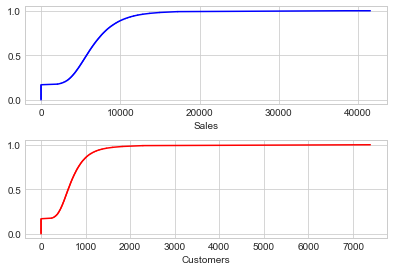

In [3]:
figure, axes = plt.subplots(nrows = 2, ncols = 2)
figure.tight_layout(pad = 2.0)

plt.subplot(211)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, 
        label = 'statsmodel', color = 'blue');
plt.xlabel('Sales')

plt.subplot(212)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, 
        label = 'statsmodel', color = 'red');
plt.xlabel('Customers'); 

sns.distplot(train.Sales);

print('Kurtosis:{}'.format(stats.kurtosis(train.Sales)))
print('Skewness:{}'.format(stats.skew(train.Sales)))

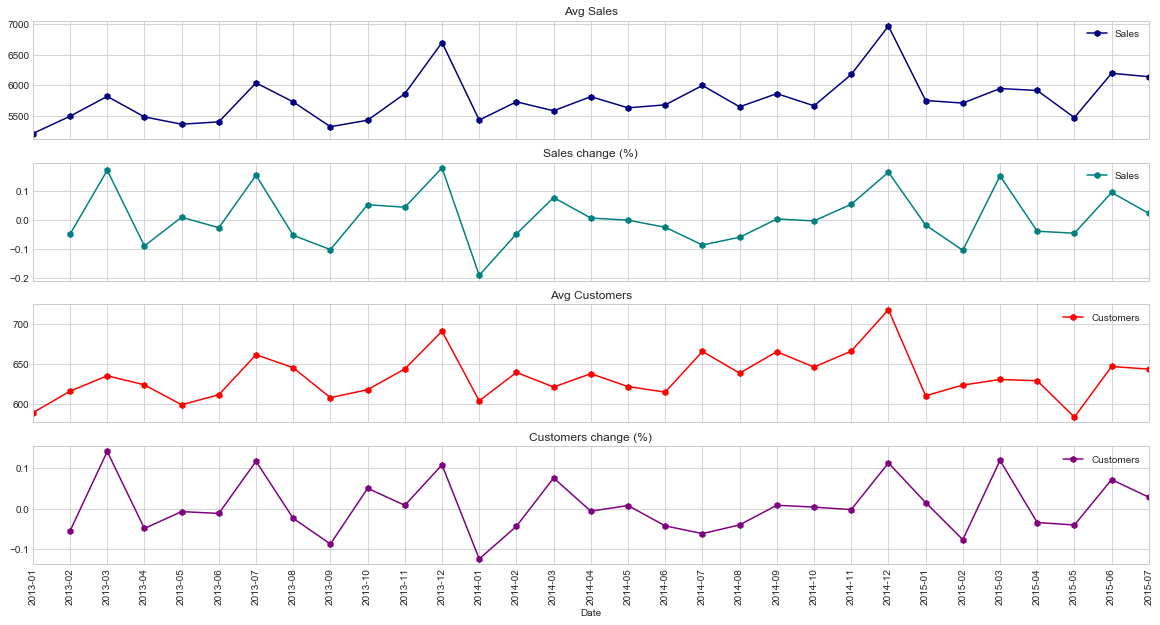

In [26]:
# Sales 
avg_sales = train.groupby('Date')['Sales'].mean()
pct_delta_sales = train.groupby('Date')['Sales'].sum().pct_change()

# Customers
avg_customers = train.groupby('Date')['Customers'].mean()
pct_delta_customers = train.groupby('Date')['Customers'].sum().pct_change()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, 
                               sharex = True, 
                               figsize = (20, 10))

ax1 = avg_sales.plot(legend = True, 
                     ax = ax1, marker = 'h',
                     color = 'navy',
                     title = 'Avg Sales')

ax1.set_xticks(range(len(avg_sales)))
ax1.set_xticklabels(avg_sales.index.tolist(), 
                   rotation = 90)

ax2 = pct_delta_sales.plot(legend = True,
                            ax = ax2,
                            marker = 'h',
                            rot = 90, 
                            color = "teal",
                            title = "Sales change (%)")

ax3 = avg_customers.plot(legend = True, 
                         ax = ax3, 
                         marker = 'h',
                         color = 'red',
                         title = 'Avg Customers')

ax3.set_xticks(range(len(avg_customers)))
ax3.set_xticklabels(avg_customers.index.tolist(), 
                   rotation = 90)

ax4 = pct_delta_customers.plot(legend = True,
                            ax = ax4,
                            marker = 'h',
                            rot = 90,
                            color = 'purple',
                            title = "Customers change (%)")

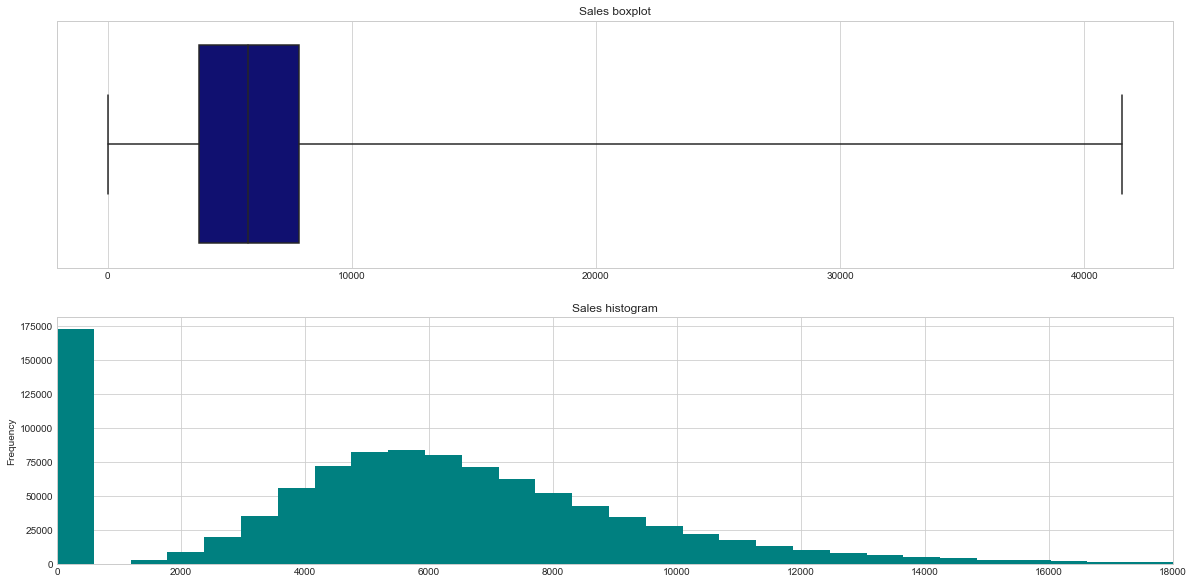

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1,
                               figsize = (20, 10))

sns.boxplot([train["Sales"]], 
            whis = np.inf, ax = ax1,
            color = 'navy').set_title('Sales')

train["Sales"].plot(kind = 'hist',
                    bins = 70,
                    xlim = (0, 18000),
                    ax = ax2,
                    color = 'teal')

ax1.set_title('Sales boxplot')
ax2.set_title('Sales histogram'); 

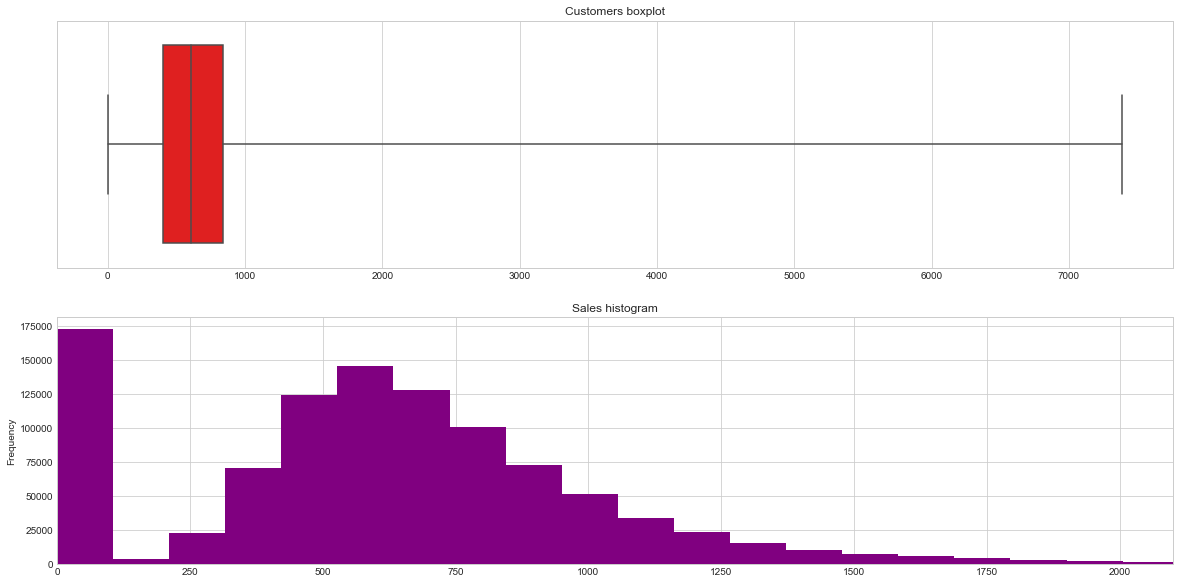

In [52]:
fig, (ax3, ax4) = plt.subplots(2, 1,
                               figsize = (20, 10))

sns.boxplot([train["Customers"]], 
            whis = np.inf, 
            ax = ax3,
            color = 'red')

train["Customers"].plot(kind = 'hist',
                    bins = 70,
                    xlim = (0, 2100),
                    ax = ax4,
                    color = 'purple')

ax3.set_title('Customers boxplot')
ax4.set_title('Sales histogram');

In [39]:
# StateHoliday have 0 as a str, merge 
train['StateHoliday'].loc[train['StateHoliday'] == 0] = '0'

train.groupby('StateHoliday')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StateHoliday,,,,,,,,
0,986159.0,5947.483893,3767.890619,0.0,3967.0,5849.0,7936.0,41551.0
a,20260.0,290.735686,1870.281698,0.0,0.0,0.0,0.0,38484.0
b,6690.0,214.311510,1816.918138,0.0,0.0,0.0,0.0,38722.0
c,4100.0,168.733171,1492.274865,0.0,0.0,0.0,0.0,32169.0


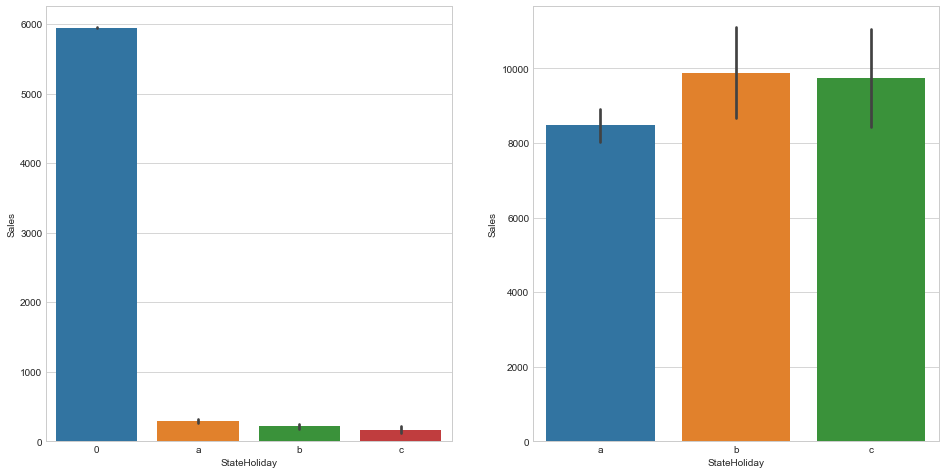

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,
                               figsize=(16, 8))

sns.barplot(x='StateHoliday', y='Sales', data = train, ax = ax1)

mask = (train["StateHoliday"] != "0") & (train["Sales"] > 0)

sns.barplot(x = 'StateHoliday', y = 'Sales', 
            data=train[mask], ax=ax2)

In [68]:
t = train.groupby('Store')['Sales'].mean()
t.head()

Store
1    3945.704883
2    4122.991507
3    5741.253715
4    8021.769639
5    3867.110403
Name: Sales, dtype: float64

In [8]:
train['Sale/Customer'] = train['Sales']/train['Customers']

AVG = train.groupby('Store')[['Sales', 'Customers']].mean()

AVG_df = pd.DataFrame({'Store': AVG.index,
                    'Avg_Sales': AVG['Sales'],
                    'Avg_Customers': AVG['Customers']},
                columns = ['Avg_Sales', 'Avg_Customers'])

AVG_df.reset_index(inplace = True)
AVG_df.head()

,Store,Avg_Sales,Avg_Customers
0,1,3945.704883,467.646497
1,2,4122.991507,486.045648
2,3,5741.253715,620.286624
3,4,8021.769639,1100.057325
4,5,3867.110403,444.360934


In [9]:
store.fillna(0, inplace = True)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

store_df = pd.merge(AVG_df, store, on = 'Store')

store_df.head()

,Store,Avg_Sales,Avg_Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,4122.991507,486.045648,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,3867.110403,444.360934,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


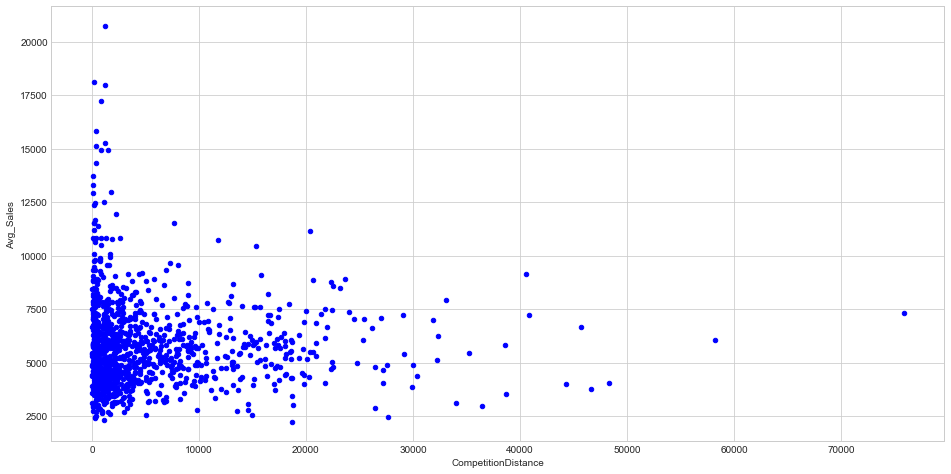

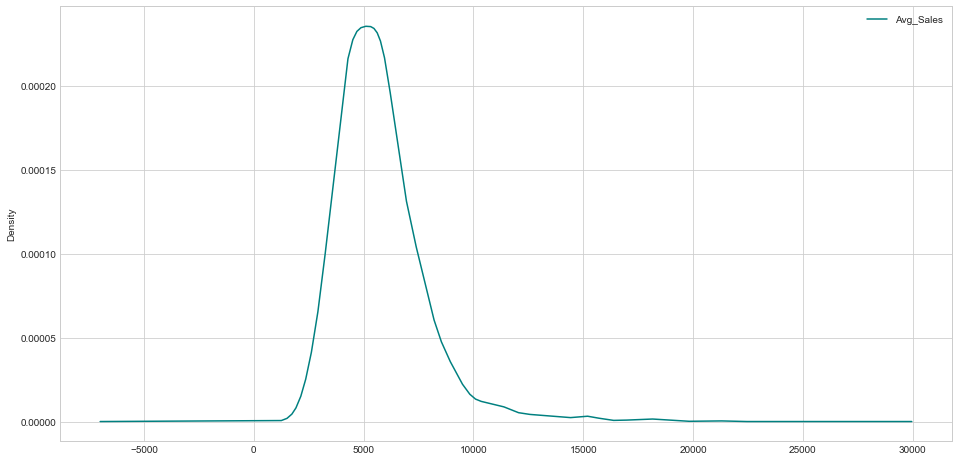

In [111]:
store_df.plot(kind = 'scatter',
              x = 'CompetitionDistance',
              y = 'Avg_Sales', 
              color = 'blue',
              figsize = (16, 8))

store_df.plot(kind = 'kde',
              x = 'CompetitionDistance',
              y = 'Avg_Sales', 
              color = 'teal', 
              figsize = (16, 8))

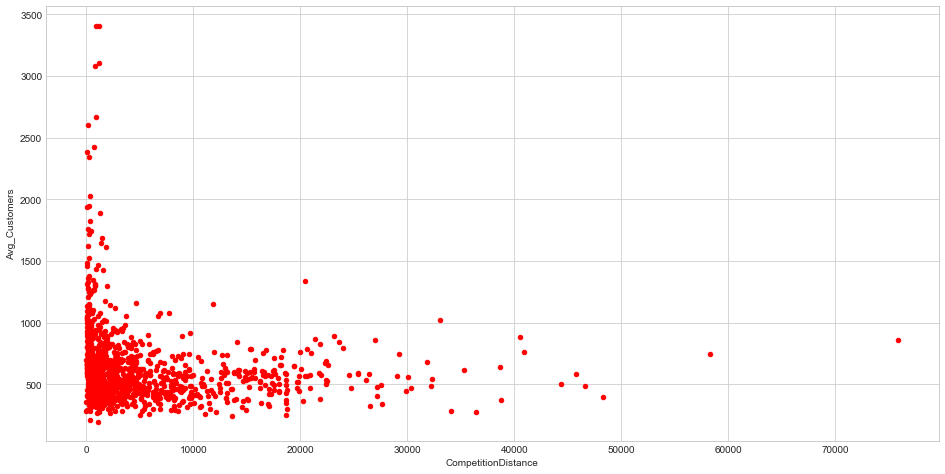

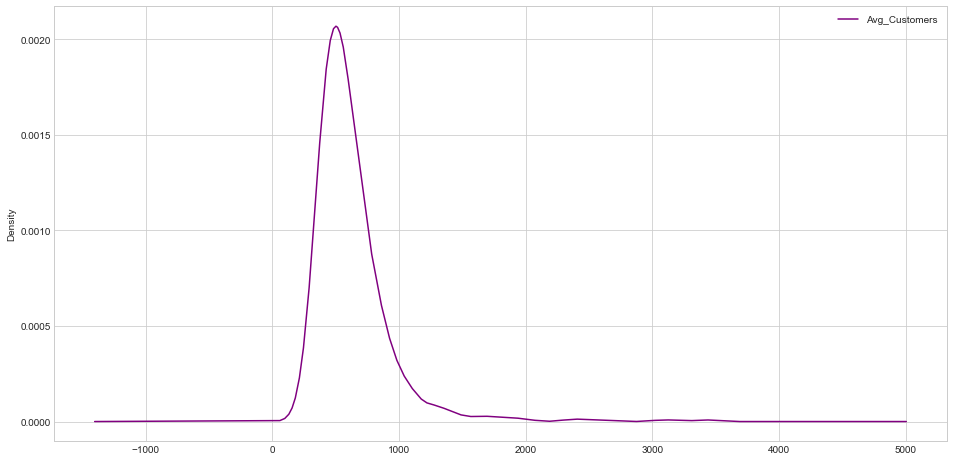

In [110]:
store_df.plot(kind = 'scatter',
              x = 'CompetitionDistance',
              y = 'Avg_Customers', 
              color = 'red',
              figsize = (16, 8))

store_df.plot(kind = 'kde',
              x = 'CompetitionDistance',
              y = 'Avg_Customers', 
              color = 'purple', 
              figsize = (16, 8))

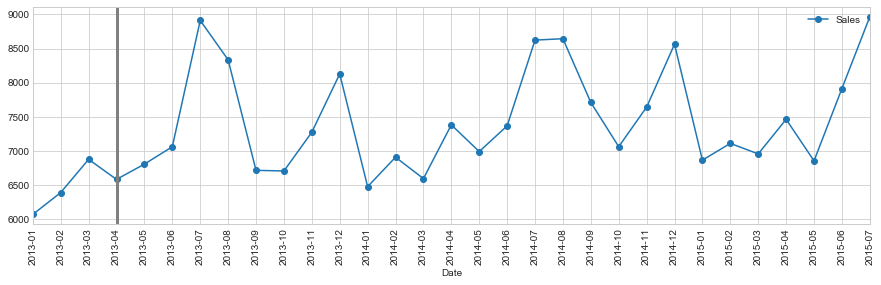

In [120]:
store_id = 7
store = train[train['Store'] == store_id]

avg_store_sales = store.groupby('Date')["Sales"].mean()

# year, and month when Competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

ax = avg_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(avg_store1_sales)))
ax.set_xticklabels(avg_store1_sales.index.tolist(), rotation=90)

if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')

In [7]:
df = pd.read_csv('allstore.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['quarter'] = df['Date'].apply(lambda x: x.quarter)

df['weekday'] = df.apply(lambda row: row['Date'].weekday(), axis = 1)
df['weekday'] = (df['weekday'] < 5).astype(int)

df.set_index('Date', inplace = True)

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

df['day_of_year'] = df.index.dayofyear
df['day_of_week'] = df.index.dayofweek

df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Unnamed: 0,StoreType,...,Promo2SinceYear,PromoInterval,quarter,weekday,year,month,day,week_of_year,day_of_year,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,1,c,...,x,x,3,1,2015,7,31,31,212,4
2015-07-30,1,4,5020,546,1,1,0,1,1,c,...,x,x,3,1,2015,7,30,31,211,3
2015-07-29,1,3,4782,523,1,1,0,1,1,c,...,x,x,3,1,2015,7,29,31,210,2
2015-07-28,1,2,5011,560,1,1,0,1,1,c,...,x,x,3,1,2015,7,28,31,209,1
2015-07-27,1,1,6102,612,1,1,0,1,1,c,...,x,x,3,1,2015,7,27,31,208,0


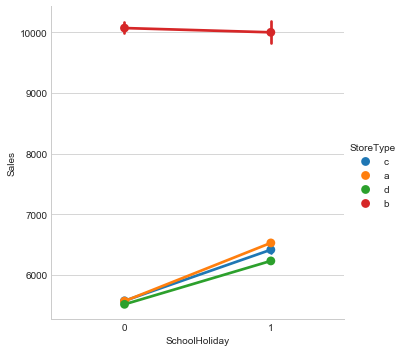

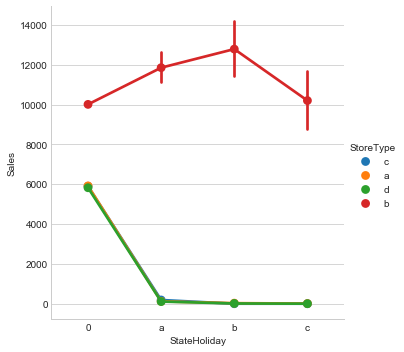

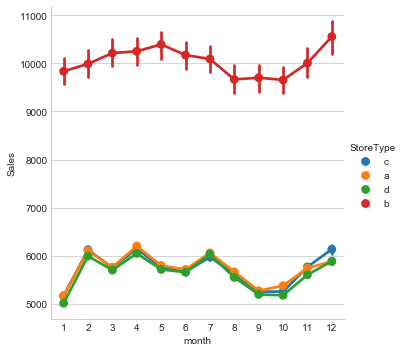

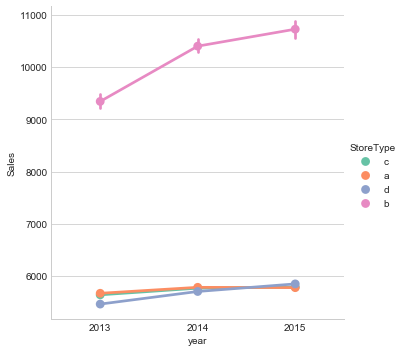

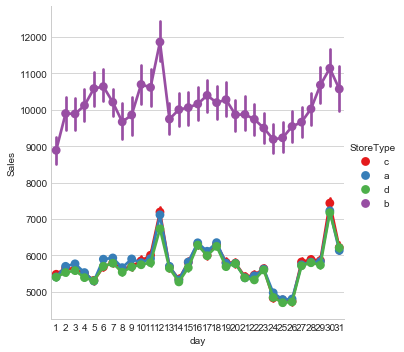

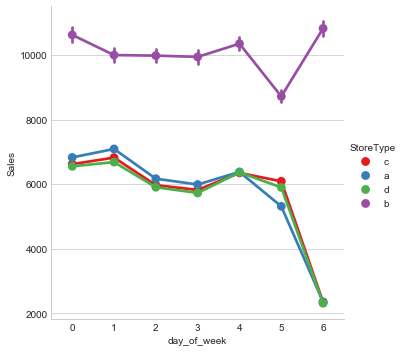

In [8]:
sns.factorplot(data = df,
              x = 'SchoolHoliday',
              y = 'Sales',
              hue = 'StoreType')

sns.factorplot(data = df,
              x = 'StateHoliday',
              y = 'Sales',
              hue = 'StoreType');

sns.factorplot(data = df,
              x = 'month',
              y = 'Sales',
              hue = 'StoreType');

sns.factorplot(data = df,
              x = 'year',
              y = 'Sales',
              hue = 'StoreType',
              palette = 'Set2');

sns.factorplot(data = df,
              x = 'day',
              y = 'Sales',
              hue = 'StoreType',
              palette = 'Set1')

sns.factorplot(data = df,
              x = 'day_of_week',
              y = 'Sales',
              hue = 'StoreType',
              palette = 'Set1')

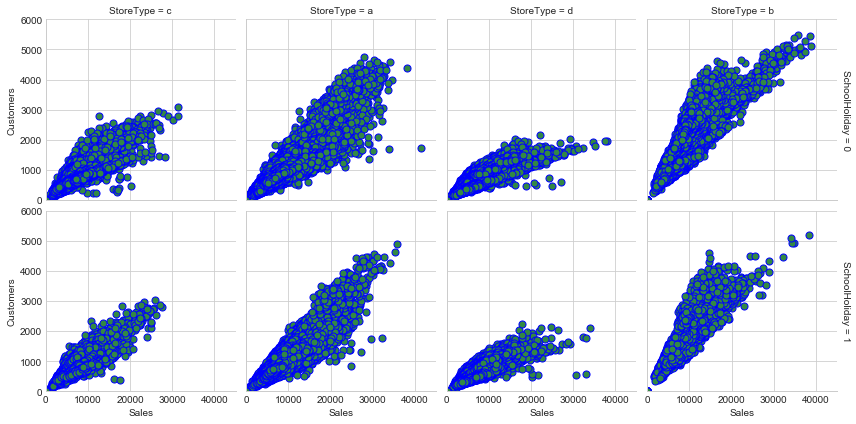

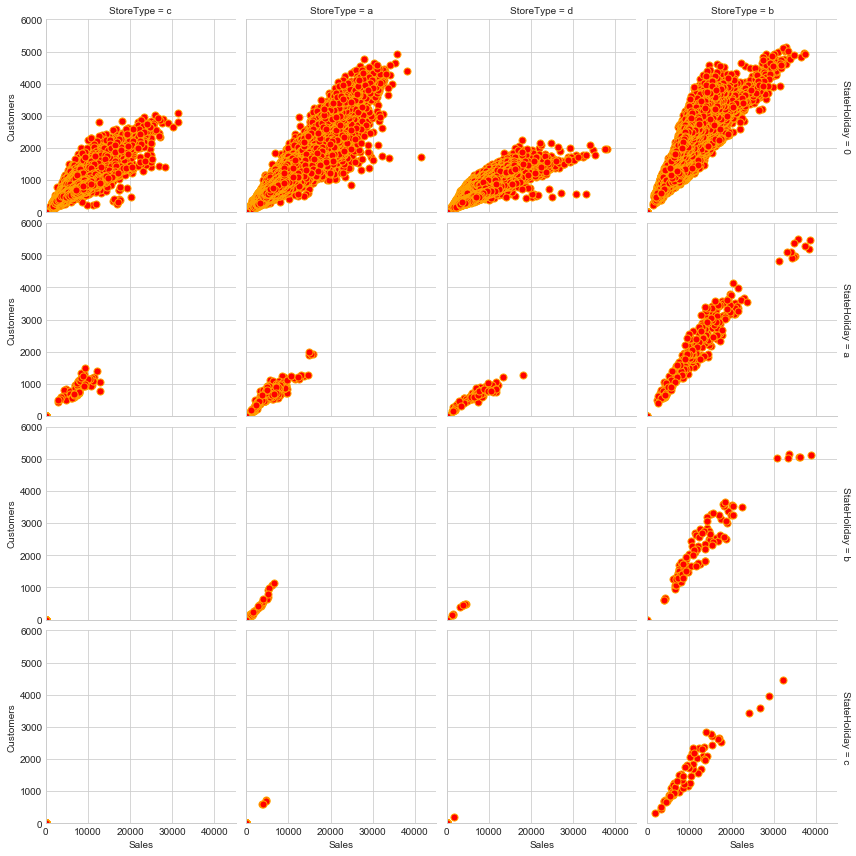

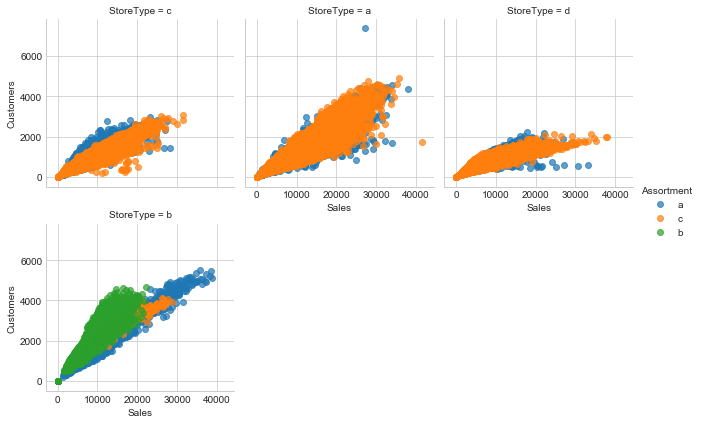

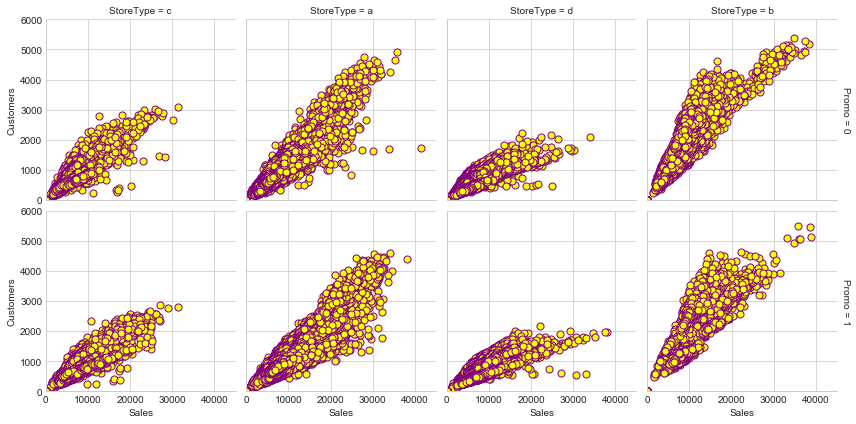

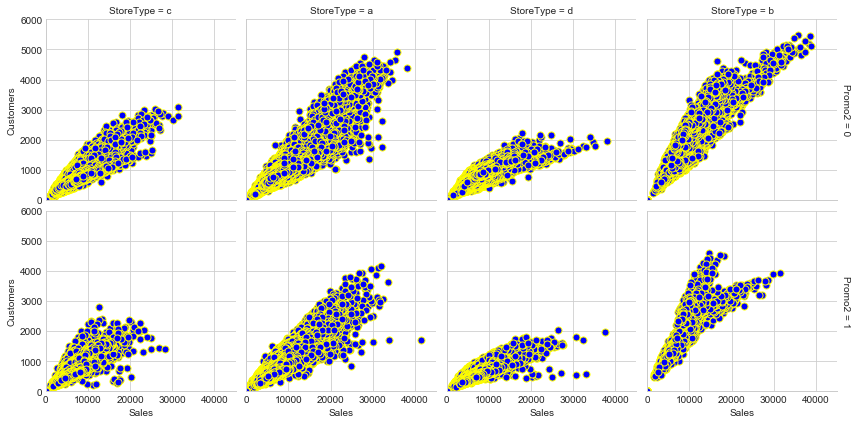

In [9]:
# Sc holiday 
g = sns.FacetGrid(df, col = 'StoreType', row = 'SchoolHoliday',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = '#338844',
      edgecolors = 'blue', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

# St holiday
g = sns.FacetGrid(df, col = 'StoreType', row = 'StateHoliday',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = 'red',
      edgecolors = 'orange', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

# Assortment 
g = sns.FacetGrid(df, col = "StoreType", hue = "Assortment",
                  margin_titles = True, col_wrap=3)

g.map(plt.scatter, 'Sales', 'Customers', alpha=.7)
g.add_legend()

# Promo 
g = sns.FacetGrid(df, col = 'StoreType', row = 'Promo',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = 'yellow',
      edgecolors = 'purple', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

# Promo2 
g = sns.FacetGrid(df, col = 'StoreType', row = 'Promo2',
                margin_titles = True, height = 3)

g.map(plt.scatter, 'Sales', 'Customers', color = 'blue',
      edgecolors = 'yellow', s = 50, lw = 1)

g.set(xlim = (0, 45000),
      ylim = (0, 6000))

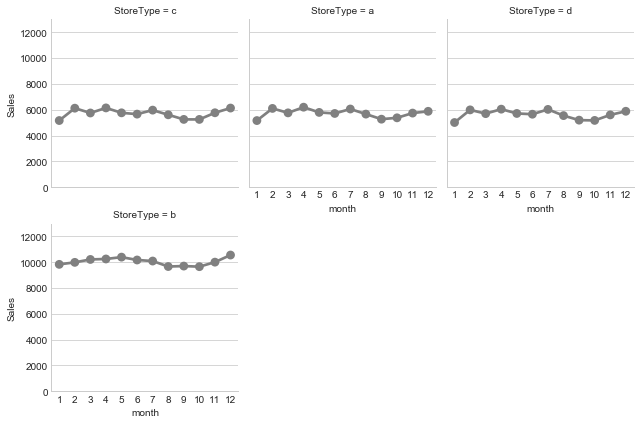

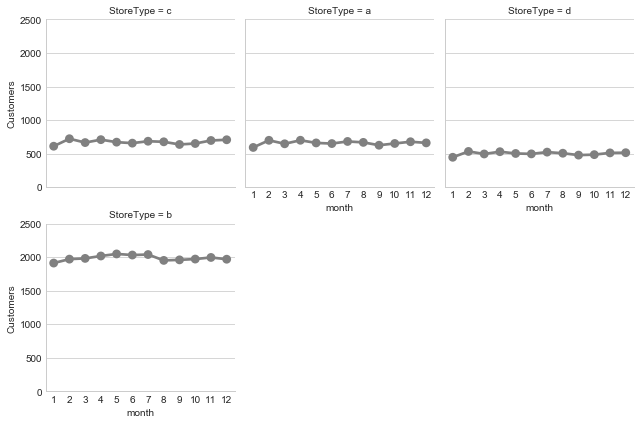

In [10]:
# Month 
g = sns.FacetGrid(df, col= "StoreType", col_wrap=3, height=3, ylim=(0, 13000))
g.map(sns.pointplot, "month", "Sales",
      color=".5", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

g = sns.FacetGrid(df, col= "StoreType", col_wrap=3, height=3, ylim=(0, 2500))
g.map(sns.pointplot, "month", "Customers",
      color=".5", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

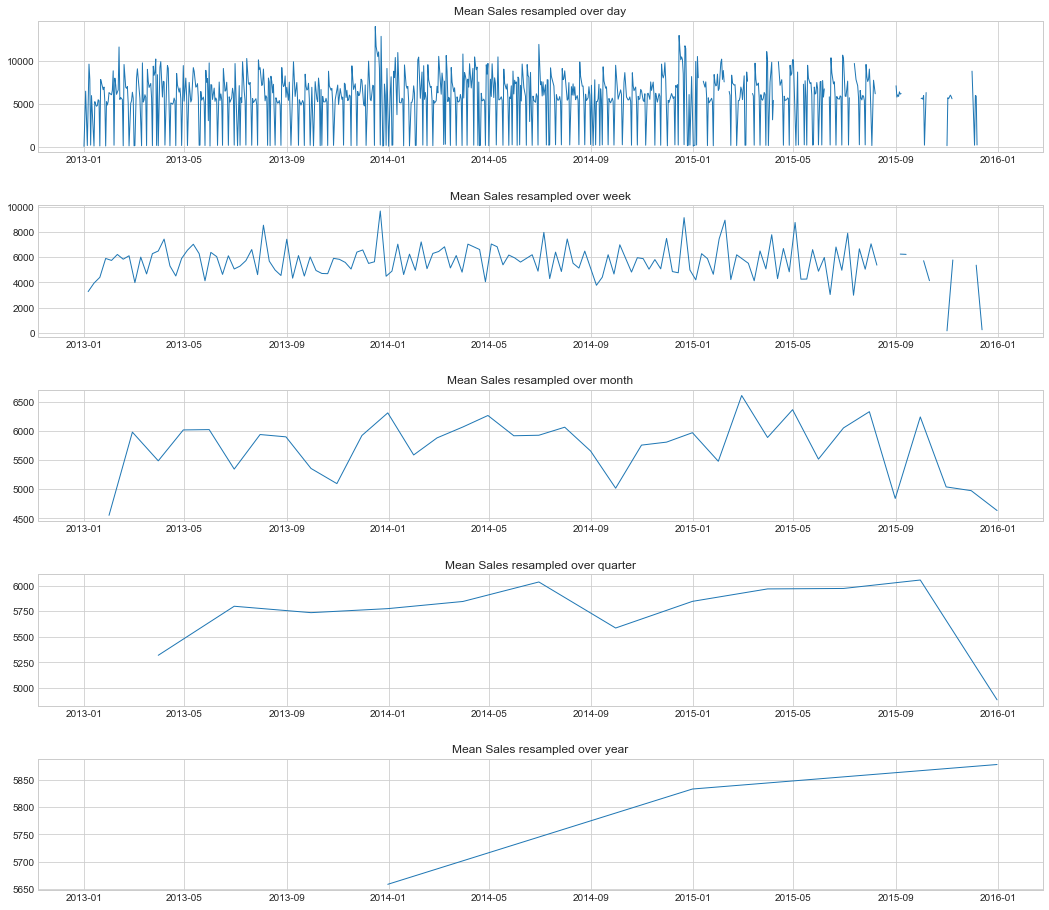

In [12]:
df1 = df.loc[:, ['Date', 'Sales']]

fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Sales'].resample('D').mean(),linewidth = 1)
ax1.set_title('Mean Sales resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['Sales'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Sales resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['Sales'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Sales resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['Sales'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Sales resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df1['Sales'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Sales resampled over year')
ax5.tick_params(axis='both', which='major');

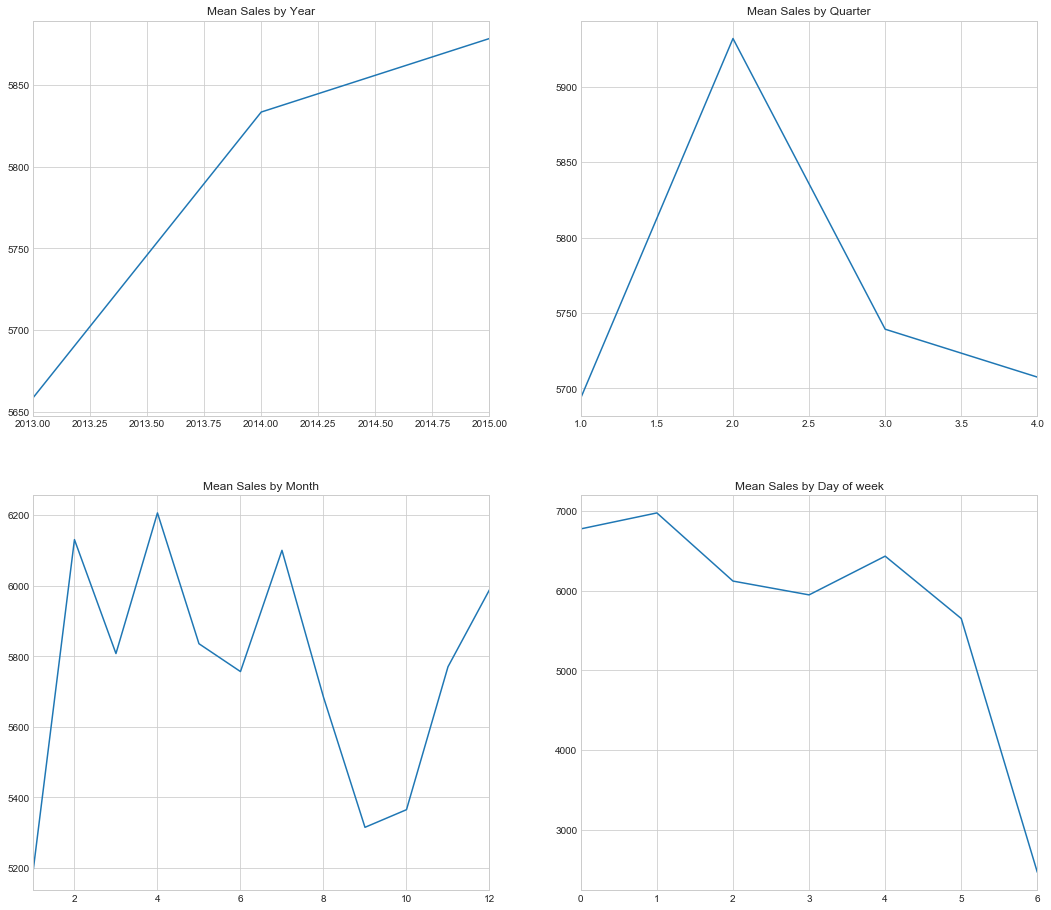

In [13]:
fig = plt.figure(figsize=(18,16))

plt.subplot(2,2,1)
df.groupby('year').Sales.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Sales by Year')

plt.subplot(2,2,2)
df.groupby('quarter').Sales.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Sales by Quarter')

plt.subplot(2,2,3)
df.groupby('month').Sales.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Sales by Month')

plt.subplot(2,2,4)
df.groupby('day_of_week').Sales.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Sales by Day of week');

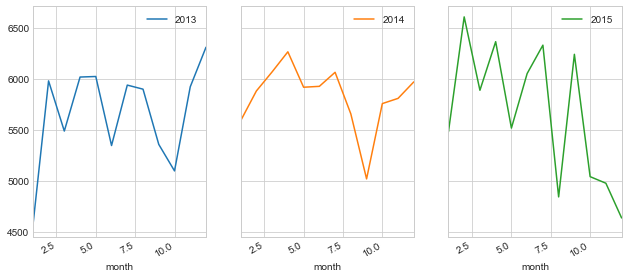

In [14]:
# df = df.reset_index(drop = True)

pd.pivot_table(df, values = "Sales", 
               columns = "year", index = "month").plot(subplots = True,
                                                       figsize=(18, 16), 
                                                       layout=(3, 5), 
                                                       sharey=True);

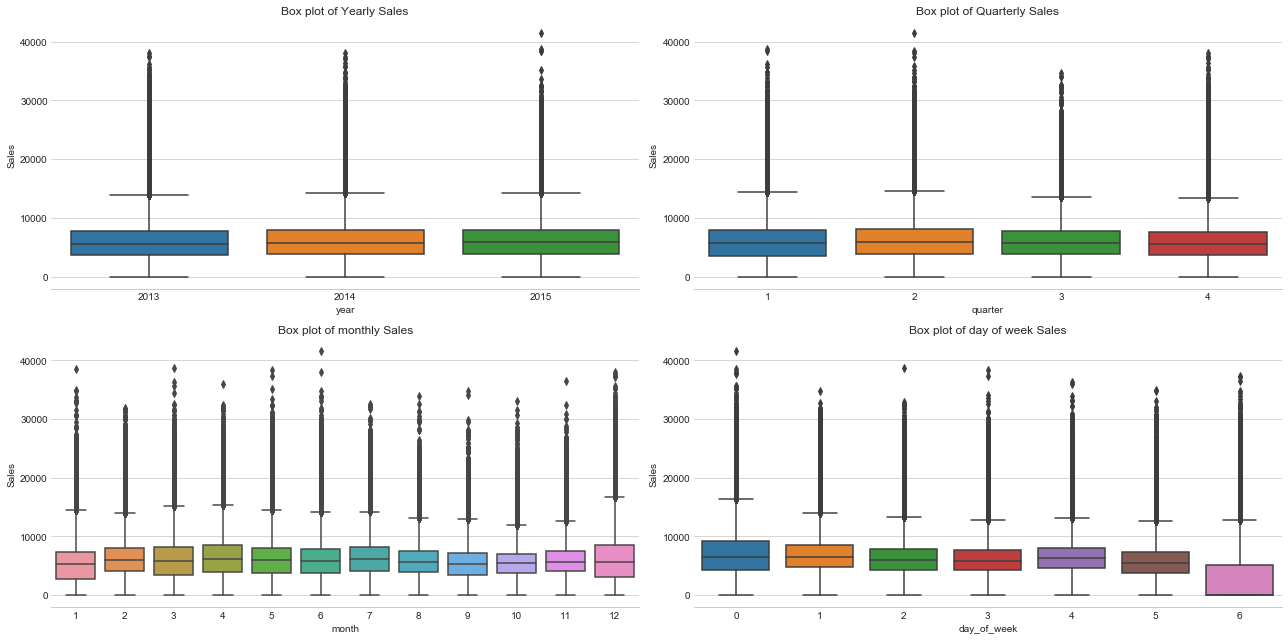

In [15]:
plt.figure(figsize=(18,9))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.2)

sns.boxplot(x="year", y="Sales", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Sales')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,2)
sns.boxplot(x="quarter", y="Sales", data=df)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Sales')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
sns.boxplot(x="month", y="Sales", data=df)
plt.xlabel('month')
plt.title('Box plot of monthly Sales')
sns.despine(left=True)
plt.tight_layout();

plt.subplot(2,2,4)
sns.boxplot(x="day_of_week", y="Sales", data=df)
plt.xlabel('day_of_week')
plt.title('Box plot of day of week Sales')
sns.despine(left=True)
plt.tight_layout();

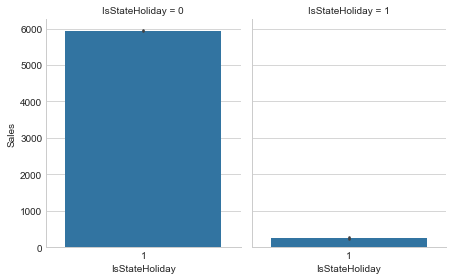

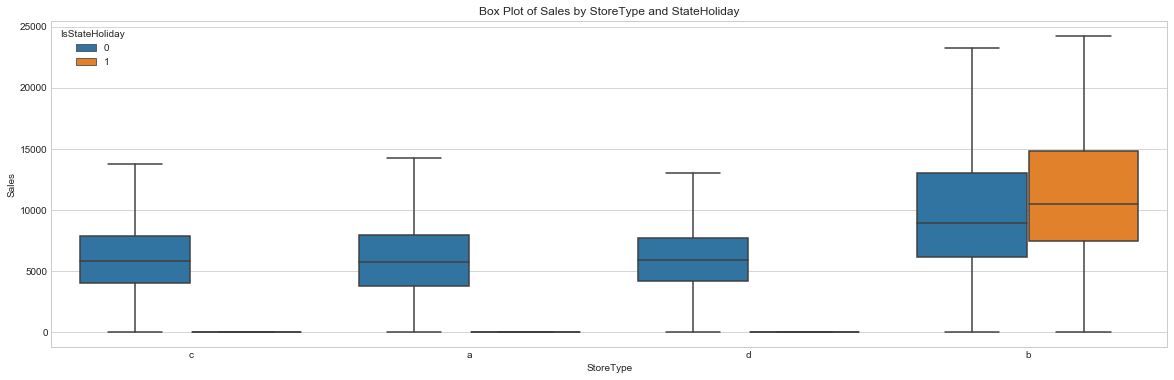

In [16]:
def SH(c):
    if c['StateHoliday'] == 'a':
        return 1
    elif c['StateHoliday'] == 'b':
        return 1
    elif c['StateHoliday'] == 'c':
        return 1
    else:
        return 0
    
df['IsStateHoliday'] = df.apply(SH, axis = 1)

g = sns.FacetGrid(df, 
                 col = 'IsStateHoliday', 
                 height = 4, aspect = .8)

g.map(sns.barplot, 'IsStateHoliday', 'Sales');

data = pd.concat([df['StoreType'], df['Sales'], df['IsStateHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Sales by StoreType and StateHoliday')
fig = sns.boxplot(x='StoreType', y='Sales', 
                  data=data, showfliers=False, hue="IsStateHoliday")

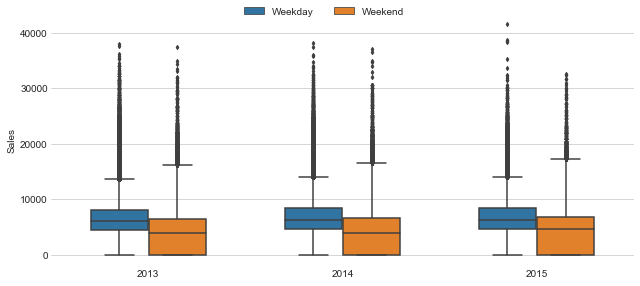

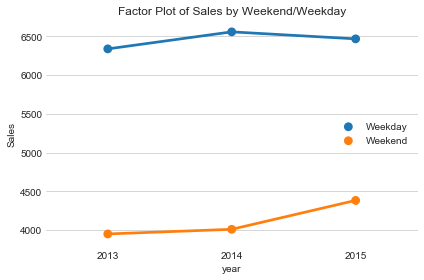

In [18]:
dic={0:'Weekend',1:'Weekday'}
df['Day'] = df.weekday.map(dic)
a=plt.figure(figsize=(9,4)) 

plt1=sns.boxplot('year','Sales',
                 hue='Day',
                 width=0.6,
                 fliersize=3,
                 data=df)     

a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False);

plt1=sns.factorplot('year','Sales',hue='Day',
                    data=df, height=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Sales by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='right');

In [22]:
train = pd.read_csv('train.csv',
                    parse_dates = True,
                    index_col = 'Date')

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

# Closed stores with 0 sales
x = train[(train.Open == 0) & (train.Sales == 0)] 
print('Count of closed stores with no sales: ', x.shape)

# Opened stores with 0 sales 
y = train[(train.Open == 1) & (train.Sales == 0)]
print('Count of opened stores with no sales: ', y.shape)

# Closed stores  
z = train[(train.Open != 0) & (train.Sales != 0)]
print('Opened Stores with sales: ', z.shape)

# Stores opened on Sundays
train[(train.Open == 1) & (train.DayOfWeek == 7)]['Store'].unique()

Count of closed stores with no sales:  (172817, 13)
Count of opened stores with no sales:  (54, 13)
Opened Stores with sales:  (844338, 13)


array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877],
      dtype=int64)

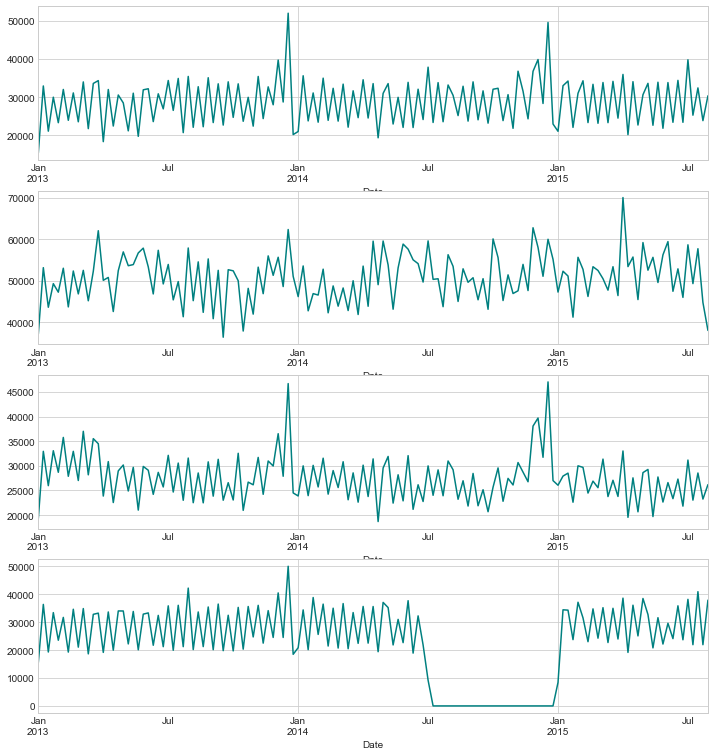

In [23]:
k = 'teal'

train['Sales'] = train['Sales'] * 1.0

sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

sales_a.resample('W').sum().plot(color = k, ax = ax1)
sales_b.resample('W').sum().plot(color = k, ax = ax2)
sales_c.resample('W').sum().plot(color = k, ax = ax3)
sales_d.resample('W').sum().plot(color = k, ax = ax4)

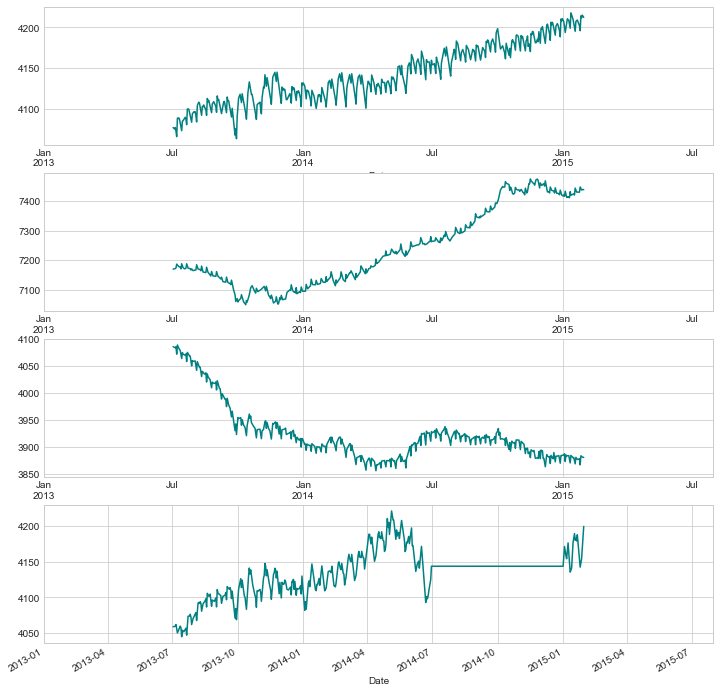

In [24]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# monthly
decomposition_a = seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = k, ax = ax1)

decomposition_b = seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = k, ax = ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = k, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', freq = 365)
decomposition_d.trend.plot(color = k, ax = ax4)

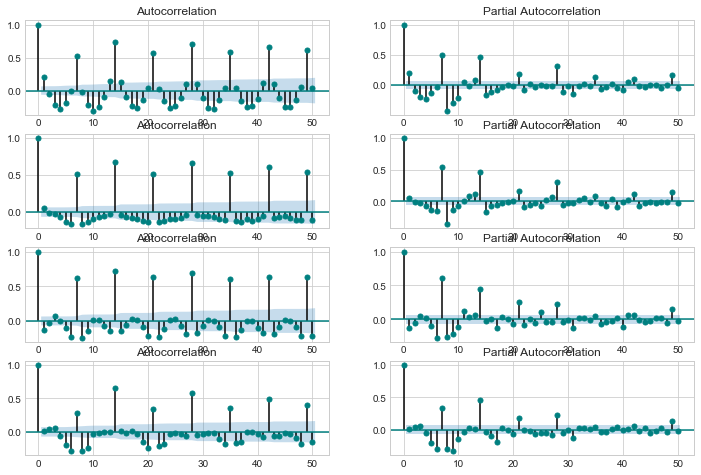

In [25]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = k)
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = k)

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = k)
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = k)

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = k)
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = k)

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = k)
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = k)

plt.show()

In [27]:
df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


In [26]:
df.groupby('StoreType')['Sales', 'Customers'].sum()

,Sales,Customers
StoreType,,
a,3165334859,363541434
b,159231395,31465621
c,783221426,92129705
d,1765392943,156904995
